# Importing libraries #

In [2]:
!pip install geopandas folium

In [3]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import datetime as dt
import numpy as np # type: ignore
import geopandas as gpd # type: ignore
import folium # type: ignore


## Importing the dataset and checking it ##

In [4]:
df = pd.read_csv(r'C:\Users\HP\Downloads\program files\Web_scrapping\NYC_Collisions.csv')
df.head(10)

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
5,4380963,2021-01-01,18:45:00,Manhattan,Harlem River Drive,NaN,40.848630,-73.927620,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Passenger Vehicle,0.0,0,0,0,0,0,0,0
6,4381116,2021-01-01,04:51:00,Brooklyn,Junius Street,NaN,40.660090,-73.900550,Other Vehicular,Passenger Vehicle,0.0,0,0,0,0,0,0,0
7,4382500,2021-01-01,16:14:00,Brooklyn,Morgan Avenue,NaN,40.705807,-73.931760,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
8,4381082,2021-01-01,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,40.663227,-73.931590,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
9,4381388,2021-01-01,12:00:00,Brooklyn,Elton Street,NaN,40.671482,-73.882840,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         238421 non-null  int64  
 1   Date                 238421 non-null  object 
 2   Time                 238421 non-null  object 
 3   Borough              231224 non-null  object 
 4   Street Name          238058 non-null  object 
 5   Cross Street         111291 non-null  object 
 6   Latitude             216098 non-null  float64
 7   Longitude            216098 non-null  float64
 8   Contributing Factor  237134 non-null  object 
 9   Vehicle Type         238421 non-null  object 
 10  Persons Injured      238420 non-null  float64
 11  Persons Killed       238421 non-null  int64  
 12  Pedestrians Injured  238421 non-null  int64  
 13  Pedestrians Killed   238421 non-null  int64  
 14  Cyclists Injured     238421 non-null  int64  
 15  Cyclists Killed  

In [6]:
df.describe()

,Collision ID,Latitude,Longitude,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
count,2.384210e+05,216098.000000,216098.000000,238420.000000,238421.000000,238421.000000,238421.000000,238421.000000,238421.000000,238421.00000,238421.000000
mean,4.500533e+06,40.724492,-73.916623,0.487484,0.002663,0.079175,0.001200,0.045852,0.000197,0.34153,0.001124
std,6.887904e+04,0.081815,0.084120,0.806650,0.053535,0.285696,0.034855,0.212723,0.014039,0.77766,0.036041
min,4.073803e+06,40.499710,-74.254960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.440909e+06,40.666386,-73.962950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4.500549e+06,40.714690,-73.920610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,4.560178e+06,40.784048,-73.868616,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,4.619988e+06,40.912884,-73.700610,40.000000,3.000000,19.000000,2.000000,3.000000,1.000000,40.00000,3.000000


In [7]:
df.shape

(238421, 18)

In [8]:
df.columns

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed'],
      dtype='object')

## let's clean the data ##

In [9]:
df.isna().sum()

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

In [10]:
print(df.duplicated().sum())
# or
df_unique = df.drop_duplicates()
print(len(df) - len(df_unique))
# There is no duplicates

0
0


In [11]:
df['Borough'] = df['Borough'].fillna('unspecified')

In [12]:
df.dropna(subset=['Contributing Factor','Cross Street'],axis=0 , inplace=True)

In [13]:
df.shape

(110561, 18)

In [14]:
# changing the data type of date and time to datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Deleting unnecessary columns 
df.drop(columns=['Latitude','Longitude'],inplace=True)

In [16]:
df.isna().sum()

Collision ID           0
Date                   0
Time                   0
Borough                0
Street Name            0
Cross Street           0
Contributing Factor    0
Vehicle Type           0
Persons Injured        0
Persons Killed         0
Pedestrians Injured    0
Pedestrians Killed     0
Cyclists Injured       0
Cyclists Killed        0
Motorists Injured      0
Motorists Killed       0
dtype: int64

In [17]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df.head(5)

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Month
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January
8,4381082,2021-01-01,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January
10,4380780,2021-01-01,03:00:00,Queens,230 Street,148 Avenue,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January
15,4381013,2021-01-01,00:25:00,Queens,21 Street,21 Avenue,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January
17,4380783,2021-01-01,06:45:00,Queens,Brookville Boulevard,Rockaway Boulevard,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January


In [18]:
df['Day_Week'] = pd.to_datetime(df['Date']).dt.day_name()
df.head(5)

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Month,Day_Week
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January,Friday
8,4381082,2021-01-01,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January,Friday
10,4380780,2021-01-01,03:00:00,Queens,230 Street,148 Avenue,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January,Friday
15,4381013,2021-01-01,00:25:00,Queens,21 Street,21 Avenue,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January,Friday
17,4380783,2021-01-01,06:45:00,Queens,Brookville Boulevard,Rockaway Boulevard,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,January,Friday


In [19]:
monthly_collisions = df.groupby('Month').size().sort_index()
monthly_collisions

Month
April         8717
August        8650
December      8040
February      9681
January      10708
July          8603
June          9160
March        11714
May           9001
November      8346
October       9052
September     8889
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110561 entries, 4 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         110561 non-null  int64         
 1   Date                 110561 non-null  datetime64[ns]
 2   Time                 110561 non-null  object        
 3   Borough              110561 non-null  object        
 4   Street Name          110561 non-null  object        
 5   Cross Street         110561 non-null  object        
 6   Contributing Factor  110561 non-null  object        
 7   Vehicle Type         110561 non-null  object        
 8   Persons Injured      110561 non-null  float64       
 9   Persons Killed       110561 non-null  int64         
 10  Pedestrians Injured  110561 non-null  int64         
 11  Pedestrians Killed   110561 non-null  int64         
 12  Cyclists Injured     110561 non-null  int64         
 13  Cyclists Killed    

<Axes: xlabel='Day_Week'>

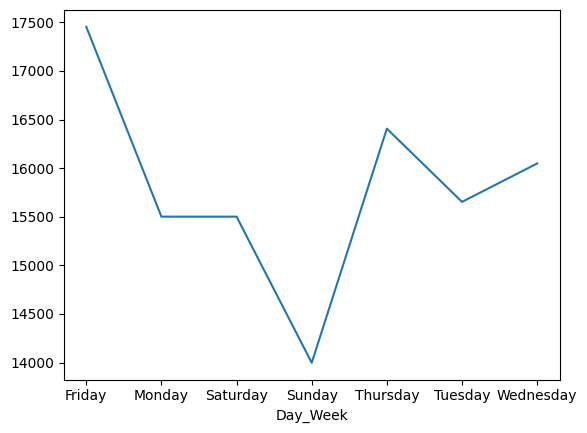

In [21]:
daily_collisions = df.groupby('Day_Week').size()
daily_collisions.plot(kind='line')

<Axes: title={'center': 'Collisions Over Time'}, xlabel='Date'>

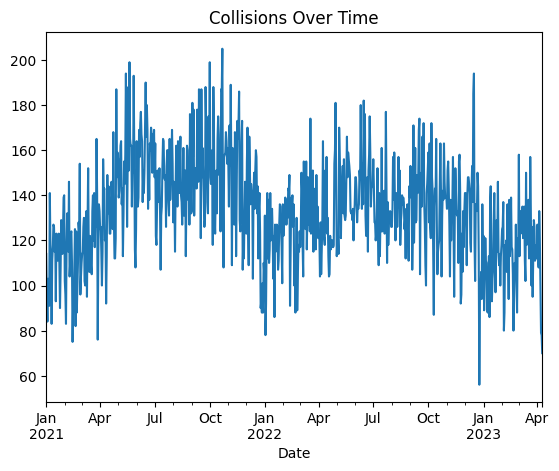

In [22]:
collisions_by_date = df.groupby('Date').size()
collisions_by_date.plot(title='Collisions Over Time')

<Axes: title={'center': 'Top Contributing Factors'}, ylabel='Contributing Factor'>

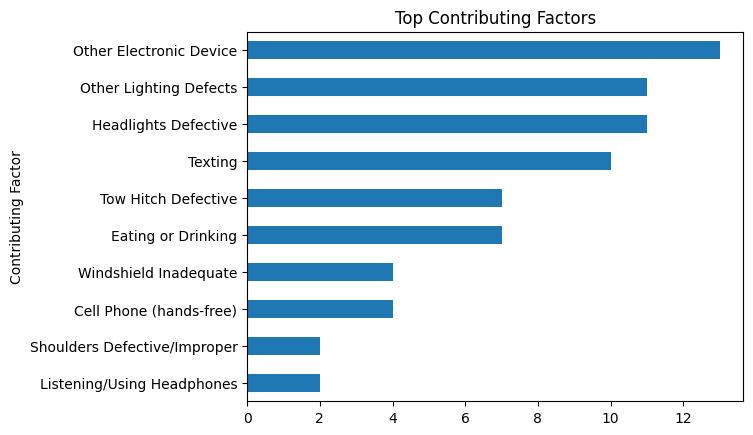

In [23]:
factor_counts = df['Contributing Factor'].value_counts().sort_values()
factor_counts.head(10).plot(kind='barh', title='Top Contributing Factors')

<Axes: title={'center': 'Collisions by Hour'}, xlabel='Hour'>

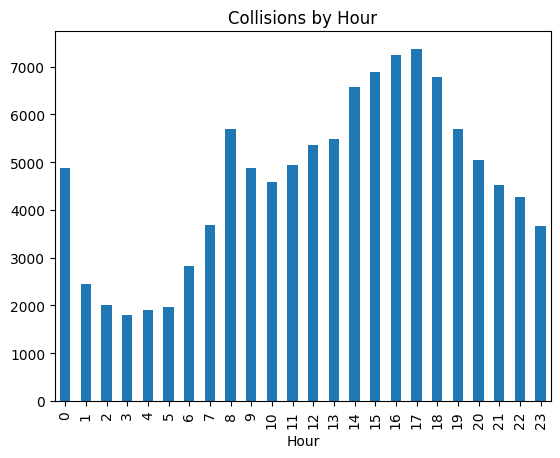

In [24]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
collisions_by_hour = df.groupby('Hour').size()
collisions_by_hour.plot(kind='bar', title='Collisions by Hour')


<Axes: >

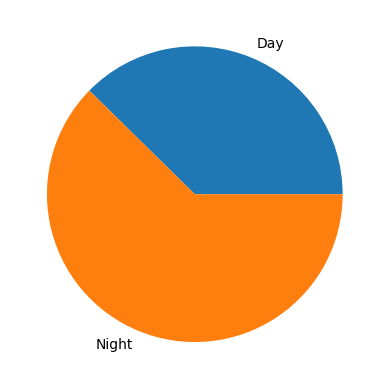

In [25]:
df['Day_or_Night'] = df['Hour'].apply(lambda x: 'Day' if 0 <= x < 12 else 'Night')
collisions_by_light = df.groupby('Day_or_Night').size()
collisions_by_light.plot(kind='pie')